In [91]:
#In this file, I will do some initial visualization of the categorical variables using seaborn and violin plots and
#then will finish preprocessing by normalizing each of the columns in the dataframe using min-max normalization
#and then go on to visualize the numerical data 1) generally for all position players and then 2) by each position. 

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
pitchers = pd.read_csv('/content/drive/MyDrive/Data_Science_Projects/MLB/pitcher_stats_clean.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [92]:
pitchers.columns

Index(['name', 'throws', 'age', 'stints', 'teamID', 'LG', 'POS1', 'W', 'L',
       'CG', 'ShO', 'GP', 'GS', 'SV', 'GF', 'IPOuts', ' IP ', ' ERA ', 'HA',
       'ER', 'HRA', 'BBA', 'SOA', 'IBBA', 'WP', 'HPBA', 'BK', 'BFP', 'RA',
       ' CMD ', ' DOM ', ' CTL ', ' HR9 ', ' WHIP ', ' WRIP ', 'HRBIB',
       ' RAVG ', ' FIP ', ' DERA ', ' STUFF ', ' GURU ', 'salary', 'WAR'],
      dtype='object')

# Breakdown of the various features (some are advanced pitching stats)


*   Throws = throwing arm
*   Stints = 
*   LG = League (American or National)
*   POS1 = Position
*   W = Wins
*   L = Losses
*   CG = Complete Games
*   ShO = Shutouts
*   GP = Games played
*   GS = Games Started
*   SV = Saves
*   GF = Games Finished
*   IPOuts = Outs pitched (innings pitched * 3)
*   IP = Innings Pitched
*   ERA = Earned Run Average
*   HA = 
*   ER = Earned Runs
*   HRA = 
*   BBA = 
*   SOA
*   IBBA = 
*   WP = Wild Pitches
*   HPBA
*   BK
*   BFP = Batters faced by pitcher
*   RA = Runs Allowed
*   CMD
*   DOM
*   CTL
*   HR9 = Home runs per nine innings
*   WHIP = Wins, Hits, IP
*   WRIP
*   HRBIB
*   RAVG
*   FIP
*   DERA
*   STUFF
*   GURU
*   salary = Player Salary (in millions)
*   WAR = Wins Above Replacement



























In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting salary vs. age with line at dividing line for rookie contracts of age 25:


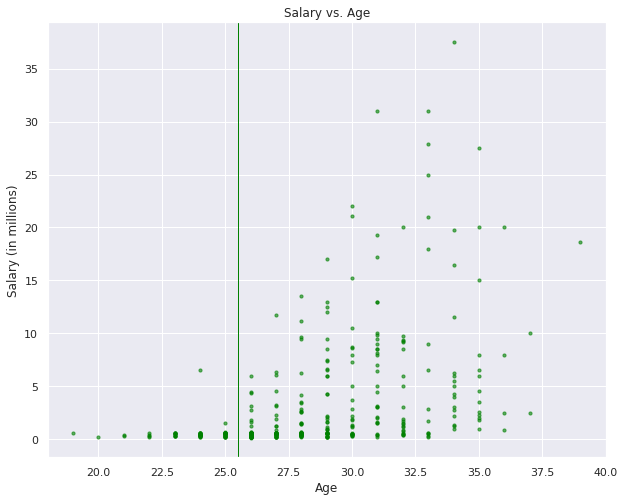

In [94]:
x= pitchers['age']
y = pitchers['salary']
plt_3 = plt.figure(figsize=(10,8))
plt.scatter(x,y,s=10, alpha = 0.6, color = 'green')
plt.xlabel('Age')
plt.ylabel('Salary (in millions)')
plt.title('Salary vs. Age')
plt.axvline(x=25.5, color = 'green', linewidth = 1)

# Visualize the distribution of MLB starting and relief pitcher salaries using the violin plot. The quartiles are shown by the dotted lines. In the cells after this, I will visualize the distribution of other features within the dataset as well.

In [95]:
pitchers['all'] = ''
starters = pitchers.loc[pitchers['POS1'] == 'Starter']
relievers = pitchers.loc[pitchers['POS1'] == 'Reliever']

# Relief Pitcher Salary Distribution

Text(0.5, 0, '2019 Relief Pitcher Salaries (millions)')

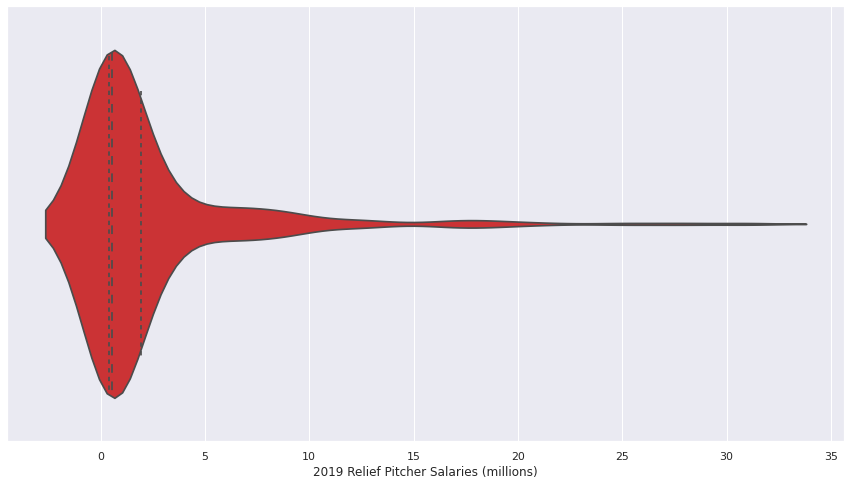

In [96]:
import seaborn as sns

sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = relievers['salary'], palette = 'Set1',inner = 'quartile', linewidth = 1.7)
ax.set_xlabel('2019 Relief Pitcher Salaries (millions)')

#Starting Pitcher Salary Distribution

Text(0.5, 0, '2019 Starting Pitcher Salaries (millions)')

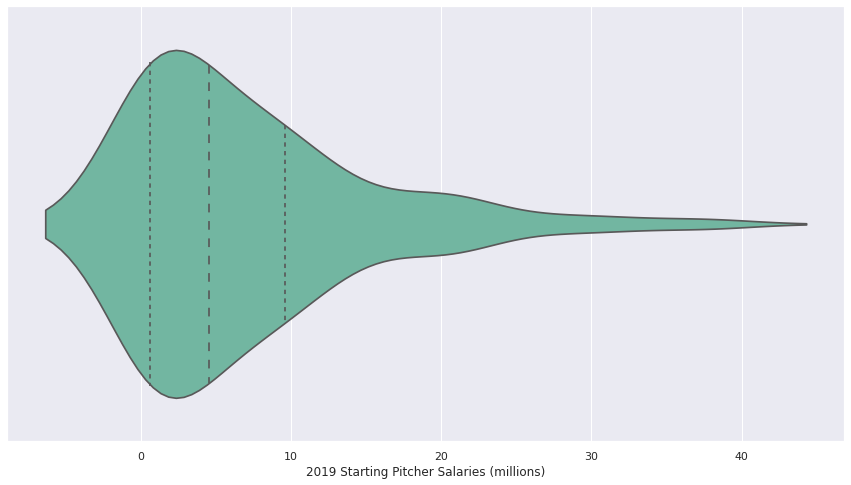

In [97]:
import seaborn as sns
#Visualize the distribution of MLB position player salaries using the violin plot. The quartiles are shown by the dotted lines. In the
#cells after this, I will visualize the distribution of other features within the dataset as well.
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = starters['salary'], palette = 'Set2',inner = 'quartile', linewidth = 1.7)
ax.set_xlabel('2019 Starting Pitcher Salaries (millions)')

# As we can see above, relief pitchers do not make very much as opposed to starters who make a lot more on average.

# Pitcher Salaries by Throwing Hand:

Text(0.5, 0, '2019 Pitcher Salaries (millions) by Throwing Hand')

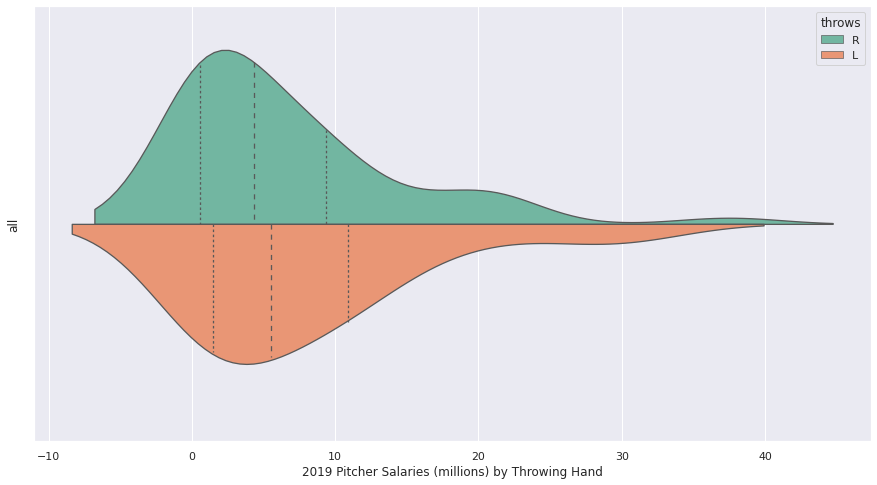

In [98]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = starters['salary'], y = starters['all'], hue = starters['throws'], split = True, palette = 'Set2',inner = 'quartile', linewidth = 1.3)
ax.set_xlabel('2019 Pitcher Salaries (millions) by Throwing Hand')

# Pitcher Salaries by League

Text(0.5, 0, '2019 Pitcher Salaries (millions) by League')

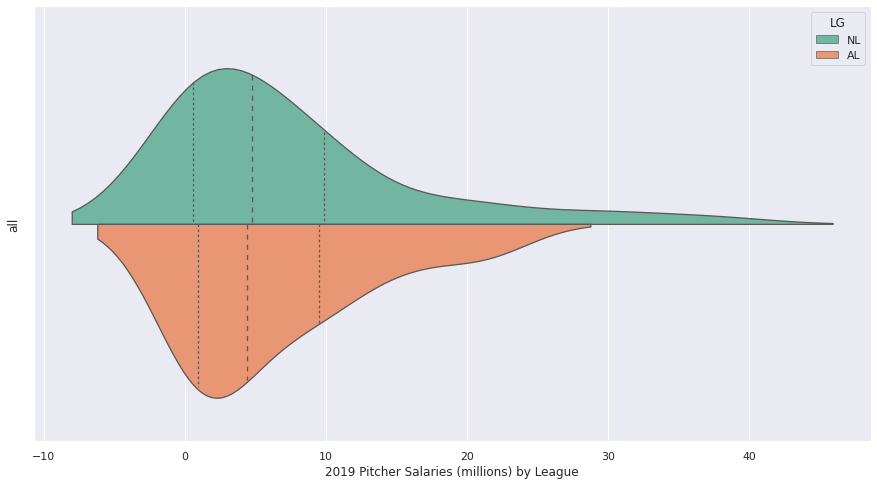

In [99]:
sns.set_theme(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(15, 8)})
ax = sns.violinplot(x = starters['salary'], y = starters['all'], hue = starters['LG'], split = True, palette = 'Set2',inner = 'quartile', linewidth = 1.3)
ax.set_xlabel('2019 Pitcher Salaries (millions) by League')

# Pitcher Salaries by Position and Throwing Hand:

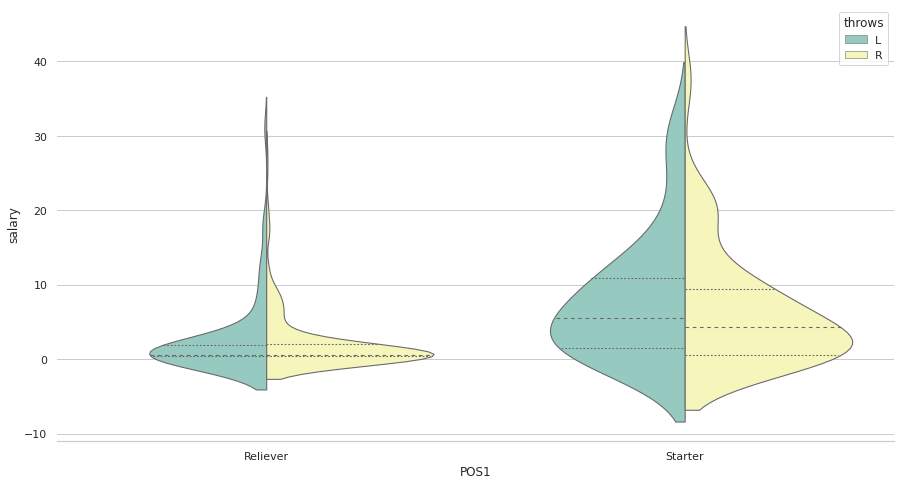

In [100]:
sns.set_theme(style= "whitegrid")
ax = sns.violinplot(x = pitchers['POS1'], y = pitchers['salary'], hue = pitchers['throws'], palette = 'Set3',
                    split = True, inner = 'quart', linewidth = 1.1)
sns.set(rc = {'figure.figsize':(15, 8)})
sns.despine(left = True)

# Starting Pitcher Pay Distribution by Age:

Text(0, 0.5, 'Salary (millions)')

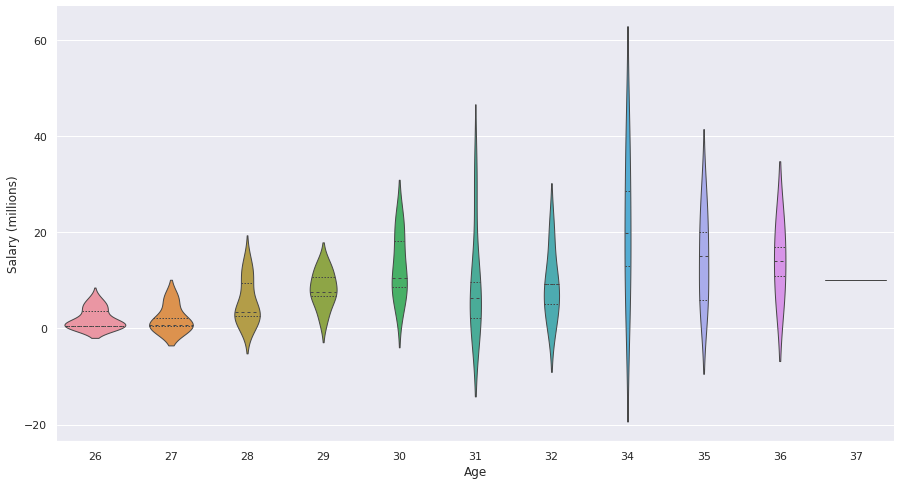

In [101]:
starters_above25 = starters.loc[starters['age'] > 25]
ax = sns.violinplot(x = starters_above25['age'], y = starters_above25['salary'],
                     inner = 'quart', linewidth = 1)
sns.despine(left = True)
sns.set(rc = {'figure.figsize':(30,5)})

ax.set_xlabel('Age')
ax.set_ylabel('Salary (millions)')

# Relief Pitcher Pay Distribution by Age:

Text(0, 0.5, 'Salary (millions)')

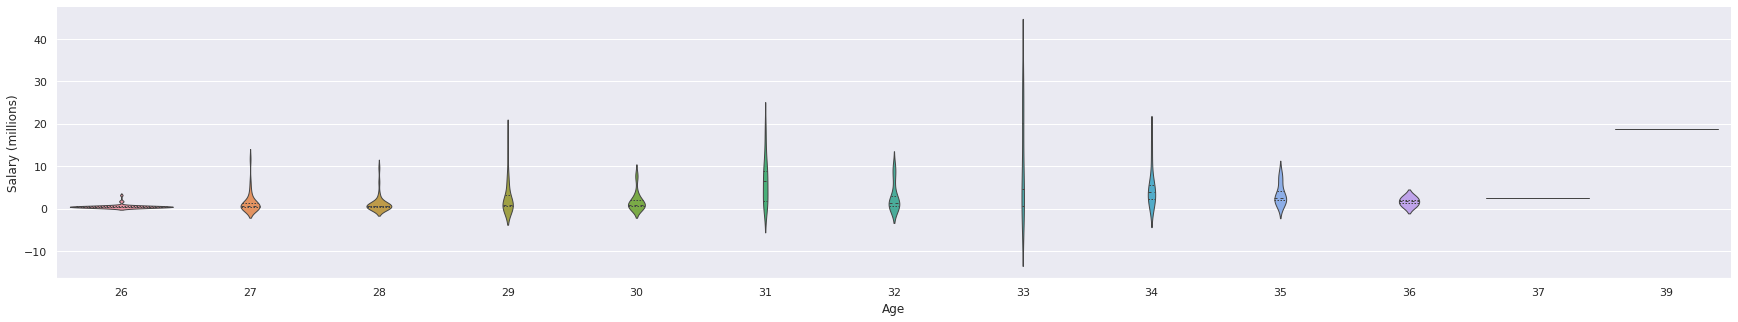

In [102]:
relievers_above25 = relievers.loc[relievers['age'] > 25]
ax = sns.violinplot(x = relievers_above25['age'], y = relievers_above25['salary'],
                     inner = 'quart', linewidth = 1)
sns.despine(left = True)
sns.set(rc = {'figure.figsize':(8,10)})

ax.set_xlabel('Age')
ax.set_ylabel('Salary (millions)')

# Finally, I will produce a few visualizations of the distribution of common stats for all pitchers to see what averages are like across the MLB and to understand what would be a respectable number for certain features

# Innings Pitched

Text(0.5, 0, 'Innings Pitched (Starters)')

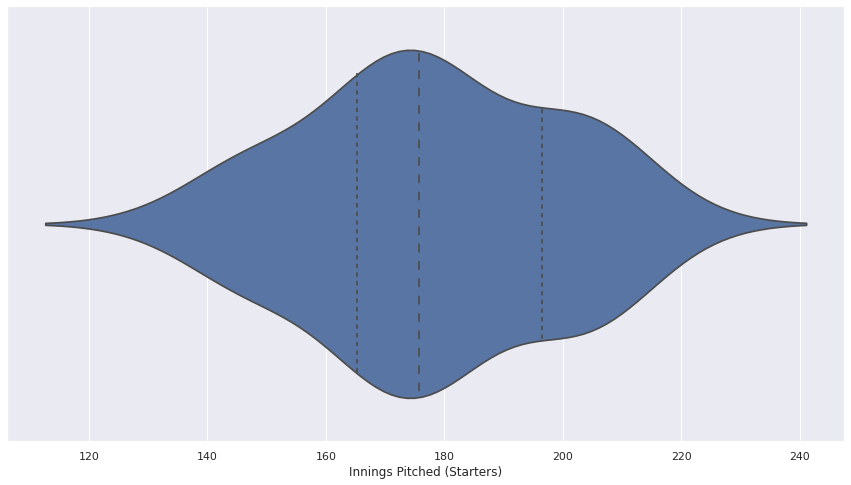

In [109]:
ax = sns.violinplot(x = starters[' IP '], pallete = 'Set2',inner = 'quart', linewidth = 1.7)
ax.set_xlabel('Innings Pitched (Starters)')

Text(0.5, 0, 'Innings Pitched (Relievers)')

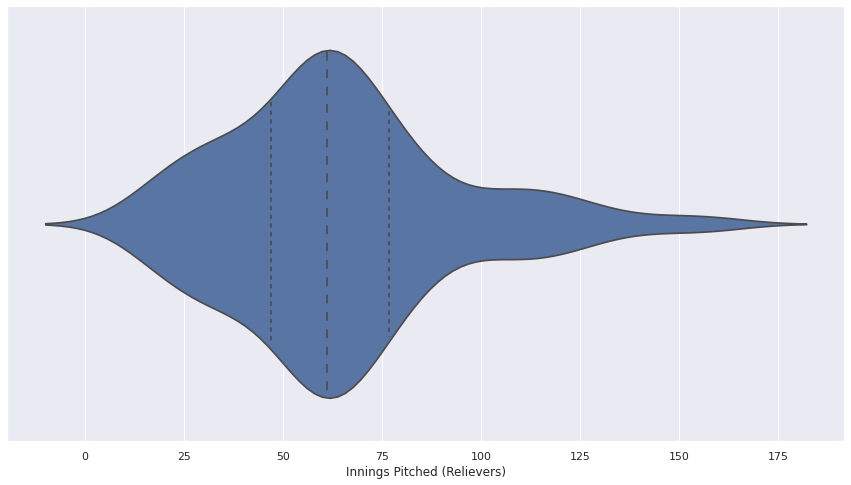

In [108]:
ax = sns.violinplot(x = relievers[' IP '], pallete = 'Set3',inner = 'quart', linewidth = 1.7)
ax.set_xlabel('Innings Pitched (Relievers)')

# WAR

Text(0.5, 0, 'Wins Above Replacement (Starters)')

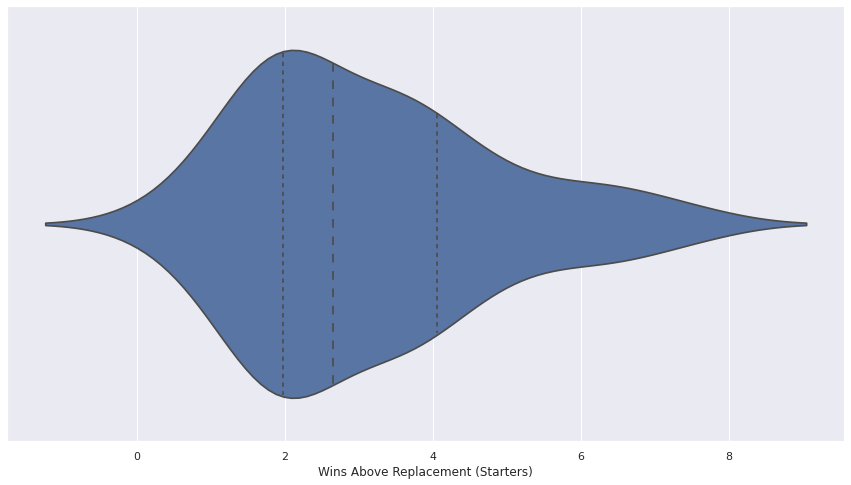

In [118]:
ax = sns.violinplot(x = starters['WAR'], pallete = 'Set3',inner = 'quart', linewidth = 1.7)
ax.set_xlabel('Wins Above Replacement (Starters)')

Text(0.5, 0, 'Wins Above Replacement (Relievers)')

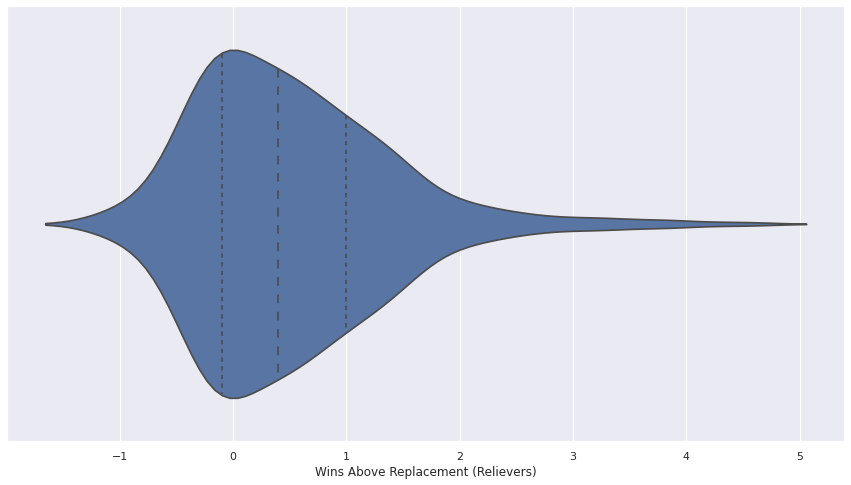

In [119]:
ax = sns.violinplot(x = relievers['WAR'], pallete = 'Set3',inner = 'quart', linewidth = 1.7)
ax.set_xlabel('Wins Above Replacement (Relievers)')

# ERA

Text(0.5, 0, 'Earned Run Average (All Pitchers)')

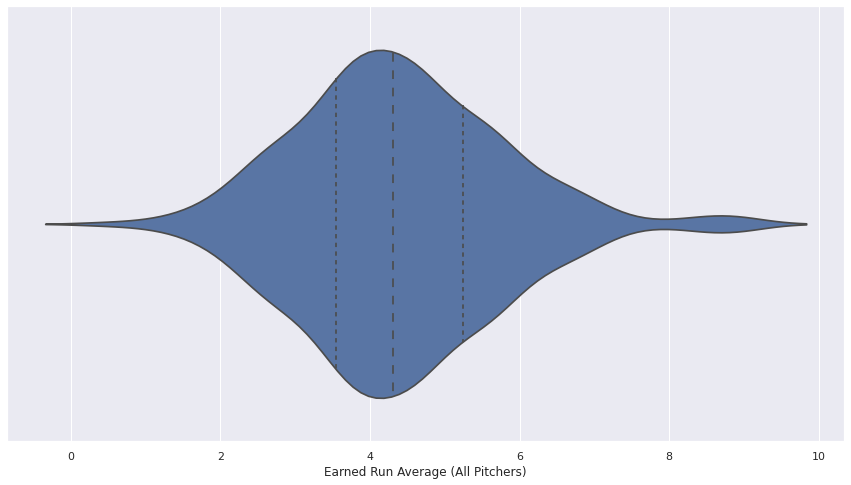

In [115]:
ax = sns.violinplot(x = pitchers[' ERA '], pallete = 'Set3',inner = 'quart', linewidth = 1.7)
ax.set_xlabel('Earned Run Average (All Pitchers)')

# WHIP

Text(0.5, 0, 'WHIP (All Pitchers)')

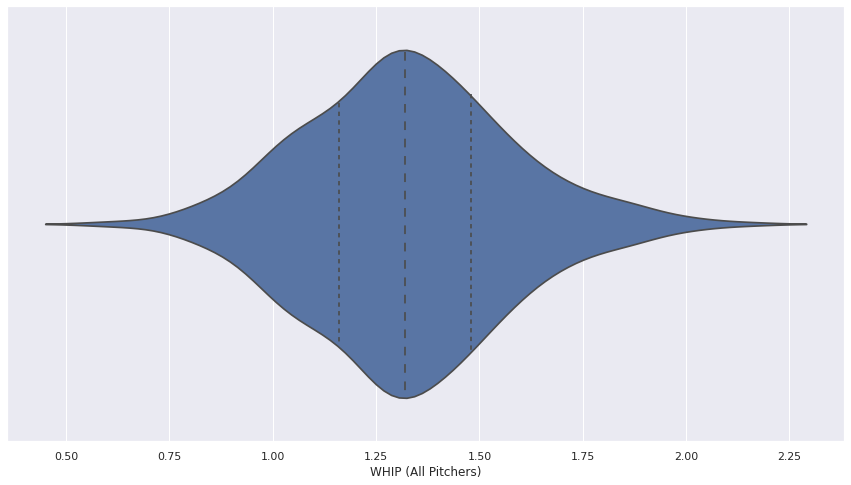

In [116]:
ax = sns.violinplot(x = pitchers[' WHIP '], pallete = 'Set3',inner = 'quart', linewidth = 1.7)
ax.set_xlabel('WHIP (All Pitchers)')